<a href="https://colab.research.google.com/github/advait-t/Machine-Learning/blob/master/ML_LAB4_EX2_J057.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2
                      )

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [2]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1


In [3]:
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis='columns', inplace=True)

df_can.rename(columns={'OdName':'Country', 'AreaName': 'Continent', 'RegName': 'Continent-Region', 'DevName':'Development-status'}, inplace=True)

df_can.set_index('Country', inplace=True)

df_can['Total'] = df_can.sum(axis='columns')

years = range(1980, 2014)

df_can.head()

,Continent,Continent-Region,Development-status,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1,15


In [4]:
#import library

import matplotlib.pyplot as plt
import matplotlib as mpl


# Q1. Scatter plot for Norway, Denmark and sweden

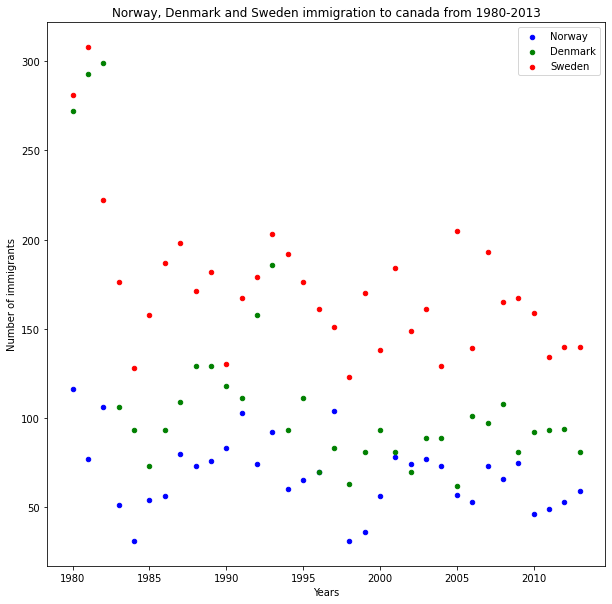

In [5]:
df = df_can.loc[['Norway','Denmark', 'Sweden'], years].transpose()
df.reset_index(inplace=True)
df.index.name = 'index'
df.rename(columns={'index':'Year'}, inplace=True)


ax0 = df.plot(
    kind='scatter',
    figsize=(10,10),
    x='Year',
    y='Norway',
    color='blue'
)

ax1 = df.plot(
    kind='scatter',
    figsize=(10,10),
    x='Year',
    y='Denmark',
    color='green',
    ax=ax0
)
ax2 = df.plot(
    kind='scatter',
    figsize=(10,10),
    x='Year',
    y='Sweden',
    color='red',
    ax=ax0
)


ax0.set_title("Norway, Denmark and Sweden immigration to canada from 1980-2013")
ax0.set_xlabel("Years")
ax0.set_ylabel("Number of immigrants")
ax0.legend(['Norway', 'Denmark', 'Sweden'], loc='upper right')

# Q2. Bubble plot for Norway, Denmark and Sweden

In [6]:
df = df_can.loc[['Norway','Denmark', 'Sweden'], years].transpose()
df.reset_index(inplace=True)
df.index.name = 'index'
df.rename(columns={'index':'Year'}, inplace=True)

normnor = (df['Norway'] - df['Norway'].min()) / (df['Norway'].max() - df['Norway'].min())
normden = (df['Denmark'] - df['Denmark'].min()) / (df['Denmark'].max() - df['Denmark'].min())
normfin = (df['Sweden'] - df['Sweden'].min()) / (df['Sweden'].max() - df['Sweden'].min())


ax0 = df.plot(kind='scatter',figsize=(10,10),x='Year',y='Norway',color='blue',ax=ax0,s = normfin*200)
ax1 = df.plot(kind='scatter',figsize=(10,10),x='Year',y='Denmark',color='green',ax=ax0,s = normfin*200)
ax2 = df.plot(kind='scatter',figsize=(10,10),x='Year',y='Sweden',color='red',ax=ax0,s = normfin*200)

ax0.set_title("Norway, Denmark and Sweden immigration to canada from 1980-2013")
ax0.set_xlabel("Years")
ax0.set_ylabel("Number of immigrants")
ax0.legend(['Norway', 'Denmark', 'Sweden'], loc='upper right')

# Q3. Boxplot for Norway, denmark and sweden

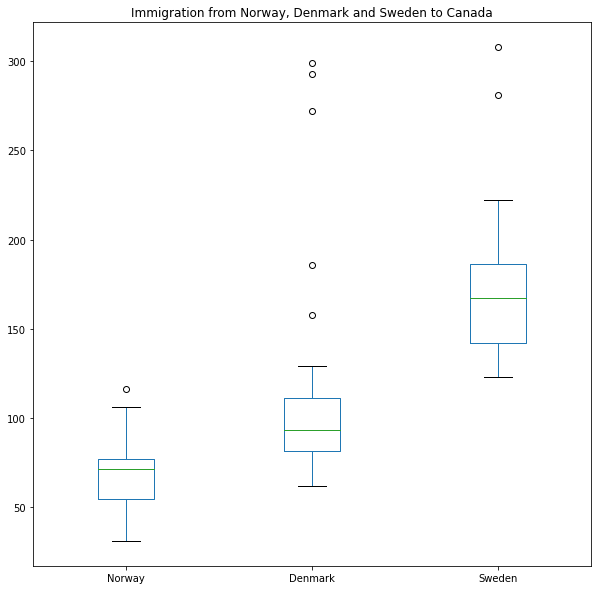

In [7]:
df_nds = df_can.loc[['Norway','Denmark', 'Sweden'],years].transpose()
df_nds.head()

df_nds.plot(kind="box",figsize=(10,10))
plt.title("Immigration from Norway, Denmark and Sweden to Canada")
plt.show()

# Q4. Waffle Chart for Norway, Denmark and Sweden

Matplotlib version:  3.2.2
Total number of tiles is 400
Norway: 77
Denmark: 129
Sweden: 194


<Figure size 432x288 with 0 Axes>

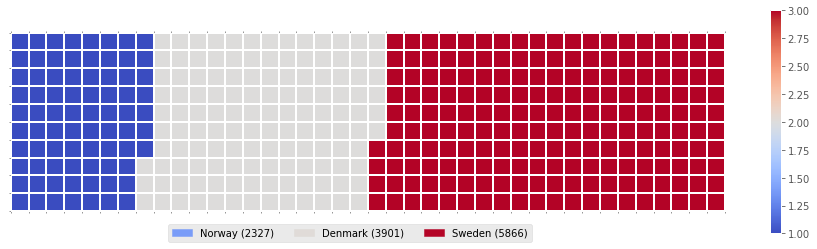

In [8]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # needed for waffle Charts

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

def create_waffle_chart(categories, values, height, width, colormap, value_sign=''):

    # compute the proportion of each category with respect to the total
    total_values = sum(values)
    category_proportions = [(float(value) / total_values) for value in values]

    # compute the total number of tiles
    total_num_tiles = width * height # total number of tiles
    print ('Total number of tiles is', total_num_tiles)
    
    # compute the number of tiles for each catagory
    tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

    # print out number of tiles per category
    for i, tiles in enumerate(tiles_per_category):
        print (df_nds.index.values[i] + ': ' + str(tiles))
    
    # initialize the waffle chart as an empty matrix
    waffle_chart = np.zeros((height, width))

    # define indices to loop through waffle chart
    category_index = 0
    tile_index = 0

    # populate the waffle chart
    for col in range(width):
        for row in range(height):
            tile_index += 1

            # if the number of tiles populated for the current category 
            # is equal to its corresponding allocated tiles...
            if tile_index > sum(tiles_per_category[0:category_index]):
                # ...proceed to the next category
                category_index += 1       
            
            # set the class value to an integer, which increases with class
            waffle_chart[row, col] = category_index
    
    # instantiate a new figure object
    fig = plt.figure()

    # use matshow to display the waffle chart
    colormap = plt.cm.coolwarm
    plt.matshow(waffle_chart, cmap=colormap)
    plt.colorbar()

    # get the axis
    ax = plt.gca()

    # set minor ticks
    ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
    # add dridlines based on minor ticks
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

    plt.xticks([])
    plt.yticks([])

    # compute cumulative sum of individual categories to match color schemes between chart and legend
    values_cumsum = np.cumsum(values)
    total_values = values_cumsum[len(values_cumsum) - 1]

    # create legend
    legend_handles = []
    for i, category in enumerate(categories):
        if value_sign == '%':
            label_str = category + ' (' + str(values[i]) + value_sign + ')'
        else:
            label_str = category + ' (' + value_sign + str(values[i]) + ')'
            
        color_val = colormap(float(values_cumsum[i])/total_values)
        legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

    # add legend to chart
    plt.legend(
        handles=legend_handles,
        loc='lower center', 
        ncol=len(categories),
        bbox_to_anchor=(0., -0.2, 0.95, .1)
    )

df_nds = df_can.loc[['Norway','Denmark', 'Sweden'],:]
df_nds.head()
categories = df_nds.index.values

value = df_nds['Total']

#create a waffle chart

width=40
height=10

colormap = plt.cm.coolwarm

create_waffle_chart(categories, value, height, width, colormap)

# Q5. Check for outliers in years 2013


In [9]:
for country in df_can.index:
  print(country)
  df = df_can.loc[[country], years].transpose()
  df = df.loc[2013].describe()
  Q1 = df.loc['25%']
  Q3 = df.loc['75%']
  IQR=Q3-Q1
  Outlier1 = Q3+1.5*IQR
  Outlier2 = Q1 - 1.5*IQR
  print(Outlier1)
  print(Outlier2)
  print('\n')

Afghanistan
2004.0
2004.0


Albania
603.0
603.0


Algeria
4331.0
4331.0


American Samoa
0.0
0.0


Andorra
1.0
1.0


Angola
45.0
45.0


Antigua and Barbuda
25.0
25.0


Argentina
282.0
282.0


Armenia
207.0
207.0


Australia
1121.0
1121.0


Austria
90.0
90.0


Azerbaijan
57.0
57.0


Bahamas
55.0
55.0


Bahrain
32.0
32.0


Bangladesh
3789.0
3789.0


Barbados
97.0
97.0


Belarus
247.0
247.0


Belgium
379.0
379.0


Belize
53.0
53.0


Benin
397.0
397.0


Bhutan
487.0
487.0


Bolivia (Plurinational State of)
107.0
107.0


Bosnia and Herzegovina
119.0
119.0


Botswana
76.0
76.0


Brazil
1714.0
1714.0


Brunei Darussalam
6.0
6.0


Bulgaria
512.0
512.0


Burkina Faso
322.0
322.0


Burundi
480.0
480.0


Cabo Verde
2.0
2.0


Cambodia
288.0
288.0


Cameroon
2439.0
2439.0


Canada
2.0
2.0


Central African Republic
169.0
169.0


Chad
86.0
86.0


Chile
273.0
273.0


China
34129.0
34129.0


China, Hong Kong Special Administrative Region
774.0
774.0


China, Macao Special Administrative Region
29.0
29

# Q6. Plot for mumbai city crimes (markers to map)

In [10]:
import numpy as np
import pandas as pd
import folium

df_incidents = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Police_Department_Incidents_-_Previous_Year__2016_.csv')

print('Dataset downloaded and read into a pandas dataframe!')

df_incidents.head()

df_incidents.shape

df1 = df_incidents.iloc[0:100,:]

lat = 37.77
long = -122.42


map2 = folium.Map(location=[lat, long], zoom_start=12)

map2

#get dataset
df1 = df_incidents.iloc[0:100,:]

#created a map
lat = 19.0760
long = 72.8777
map2 = folium.Map(location=[lat, long], zoom_start=12)


#Step 2: type of markers to use
for lat, long, labs in zip(df1.Y, df1.X, df1.Category):
       folium.CircleMarker(
           [lat, long],
           radius=5,
           color='yellow',
           fill=True,  
           popup=labs        
       ).add_to(map2)
#Step 3: show map
map2

Dataset downloaded and read into a pandas dataframe!
